# Introduction to Pytorch
![](../docs/img/pytorch.png)
PyTorch is an open source Python machine learning library based on Torch developed by Facebook. 
It is an optimized tensor library for deep learning using GPUs and CPUs.
Pytorch also provides automatic differentiation tools and a neural networks library deeply integrated with Autograd which is designed for maximum flexibility.
Many tools allowing, among other things, optimized data loading and neural network optimization are also included in the library, thus facilitating prototyping and training.

## Tensors
PyTorch uses its own Tensor library, similar and convertible with NumPy, with strong Graphics processing unit (GPU) support.
Tensors are a specialized data structure used to encode the inputs and outputs of a model, as well as the model’s parameters.  
The biggest strengths of tensors are the possibility to be run on GPUs and being optimized for automatic differentiation.  

Tensors can be initialized in various ways.  
The simplest way might be to directly create a tensor from data: 

In [5]:
import torch

x =  torch.tensor([[1,2], [3,4]])
print(x)
x.shape

tensor([[1, 2],
        [3, 4]])


torch.Size([2, 2])

You can also used built in operations similar to the one existing in NumPy:

In [6]:
x_rand = torch.rand((2,2))
x_ones = torch.ones((5))
x_zeros = torch.zeros_like(x_ones)

print(f'x_rand:\n{x_rand}\n')
print(f'x_ones:\n{x_ones}\n')
print(f'x_zeros:\n{x_zeros}\n')

x_rand:
tensor([[0.5876, 0.1292],
        [0.4716, 0.2146]])

x_ones:
tensor([1., 1., 1., 1., 1.])

x_zeros:
tensor([0., 0., 0., 0., 0.])



Another way consists in using NumPy arrays:

In [7]:
import numpy as np
x_numpy = np.array([[1,2], [1,2]])
x_torch = torch.from_numpy(x_numpy)
print(x_torch)

tensor([[1, 2],
        [1, 2]])


Be careful, when a Tensor is created from a NumPy array, any operation on one affects the other.

In [32]:
x_numpy[0,0] = 10
print(x_torch)

tensor([[10, 20],
        [10, 20]])


In [9]:
x_torch *= 10
print(x_numpy)

[[100  20]
 [ 10  20]]


Every operation you are used to performing in Numpy is available on Pytorch.

Tensor attributes describe their shape, data type, and the device on which they are stored.

In [10]:
print(f'Shape:{x_torch.shape}')
print(f'Data type:{x_torch.dtype}')
print(f'Device:{x_torch.device}')

Shape:torch.Size([2, 2])
Data type:torch.int64
Device:cpu


Among other usages, Tensors are use to store the Data in Pytorch.  
Pytorch comes with a number of preloaded datasets as well as tools to efficiently load them into memory on the fly.

In [40]:
from torchvision import datasets
from torchvision.transforms import ToTensor
from torch.utils.data import DataLoader

data = datasets.CIFAR10(root='./data', download=True, transform=ToTensor())
# ToTensor converts a PIL image or NumPy ndarray into a FloatTensor
# and scales the image's pixel intensity values in the range [0., 1.]

dataloader = DataLoader(data, batch_size=32, shuffle=True, num_workers=4)

Files already downloaded and verified


Dataloaders are iterables, they don't load the whole dataset in memory but only the minibtachs on which you want to perform operations.  
They behave like Iterators in Python.

In [41]:
X,y= next(iter(dataloader))

Unlike TensorFlow, in Pytorch the axis of the channels is located on the second dimension (the first being always the batch dimension)

In [43]:
import matplotlib.pyplot as plt

print(f"X shape: {X.shape}")
print(f"y shape: {y.shape}")

X shape: torch.Size([32, 3, 32, 32])
y shape: torch.Size([32])


Commentaire pour moi : en fait les images de cette base de données sont de taille 32*32 et avec 3 canaux (couleurs) voir
https://pytorch.org/tutorials/beginner/blitz/cifar10_tutorial.html

In [46]:
labels_map = {
    0: "airplane",
    1: "automobile",
    2: "bird",
    3: "cat",
    4: "deer",
    5: "dog",
    6: "frog",
    7: "horse",
    8: "ship",
    9: "truck",
}

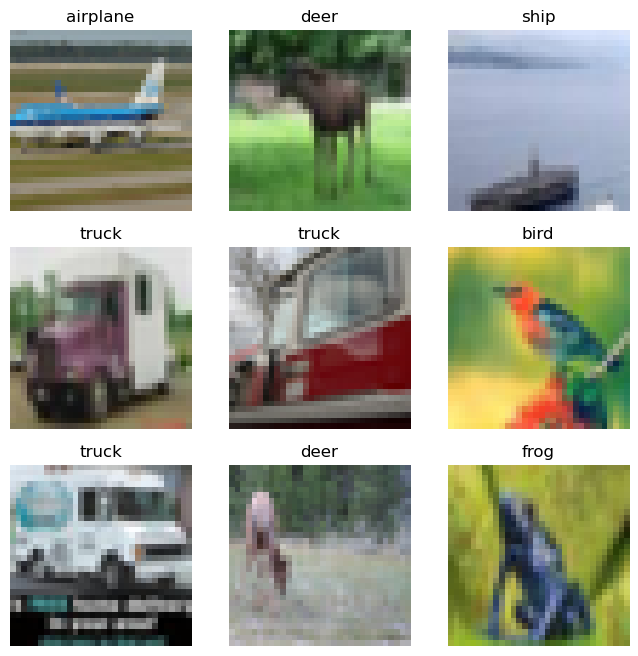

In [48]:
figure = plt.figure(figsize=(8, 8))
cols, rows = 3, 3
for i in range(1, cols * rows + 1):
    figure.add_subplot(rows, cols, i)
    plt.title(labels_map[y[i].item()])
    plt.axis("off")
    plt.imshow(X[i].permute(1, 2, 0))
plt.show()

## Neural networks in Pytorch

In Pytorch, neural networks extend the ```Module``` class.  
To create a neural network we usually create a class that will inherit the ```Module``` class.  
It is then necessary to initialize in the ```init``` method all the layers that will be used by the network. 
Each object of the module class implements the ```forward``` function.  
It is this method that will create the graph of operations that will be performed by the network.  
It is not necessary to implement a backward method, it will be automatically generated by Pytorch.  

In this section we will train a neural network to classify objects from the FashionMNIST dataset

In [49]:
training_data = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor()
)

test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor()
)

train_dataloader = DataLoader(training_data, batch_size=64, shuffle=True)
test_dataloader = DataLoader(test_data, batch_size=64, shuffle=True)

#[transforms.ToTensor(),
#     transforms.Normalize((0.5,), (0.5,))]

100.0%


Extracting data/FashionMNIST/raw/train-images-idx3-ubyte.gz to data/FashionMNIST/raw


100.0%


Extracting data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to data/FashionMNIST/raw


100.0%
100.0%

Extracting data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to data/FashionMNIST/raw

Extracting data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to data/FashionMNIST/raw



In [13]:
from torch import nn

class FashionMNISTClassifier(nn.Module):
    def __init__(self):
        super(FashionMNISTClassifier, self).__init__()
        
        self.conv1 = nn.Conv2d(1, 32, kernel_size=(5, 5))
        self.conv2 = nn.Conv2d(32, 32, kernel_size=(5, 5))
        
        self.pooling = nn.MaxPool2d(kernel_size=2, stride=2)
        self.flatten = nn.Flatten()
        
        self.dropout = nn.Dropout2d(0.2)
        
        self.linear1 = nn.Linear(in_features=32 * 4 * 4, out_features=128)
        self.linear2 = nn.Linear(in_features=128, out_features=64)
        self.linear3 = nn.Linear(in_features=64, out_features=10)

    def forward(self, x):
        x = torch.relu(self.conv1(x))
        x = self.pooling(x)
        x = torch.relu(self.conv2(x))
        x = self.pooling(x)
        
        x = self.flatten(x)    
        
        x = torch.relu(self.linear1(x))
        x = self.dropout(x)
        x = torch.relu(self.linear2(x))
        y = self.linear3(x)
        return y

In [14]:
model = FashionMNISTClassifier()
print(model)

FashionMNISTClassifier(
  (conv1): Conv2d(1, 32, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d(32, 32, kernel_size=(5, 5), stride=(1, 1))
  (pooling): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (dropout): Dropout2d(p=0.2, inplace=False)
  (linear1): Linear(in_features=512, out_features=128, bias=True)
  (linear2): Linear(in_features=128, out_features=64, bias=True)
  (linear3): Linear(in_features=64, out_features=10, bias=True)
)


A second way to create networks is to build a sequence of modules using an instance of the ``Sequential`` class.  
This class will simply create a single branch graph that will call chronologically all the elements contained in the sequence

In [15]:
model = nn.Sequential(
            nn.Conv2d(1, 32, kernel_size=(5, 5)),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.Conv2d(32, 32, kernel_size=(5, 5), stride=(1, 1)),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.Flatten(),
            nn.Dropout2d(0.2),
            nn.Linear(in_features=32 * 4 * 4, out_features=128),
            nn.ReLU(),
            nn.Linear(in_features=128, out_features=64),
            nn.ReLU(),
            nn.Linear(in_features=64, out_features=10))
print(model)

Sequential(
  (0): Conv2d(1, 32, kernel_size=(5, 5), stride=(1, 1))
  (1): ReLU()
  (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (3): Conv2d(32, 32, kernel_size=(5, 5), stride=(1, 1))
  (4): ReLU()
  (5): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (6): Flatten(start_dim=1, end_dim=-1)
  (7): Dropout2d(p=0.2, inplace=False)
  (8): Linear(in_features=512, out_features=128, bias=True)
  (9): ReLU()
  (10): Linear(in_features=128, out_features=64, bias=True)
  (11): ReLU()
  (12): Linear(in_features=64, out_features=10, bias=True)
)


You can easily mix the two ways for better readability:

In [16]:
class FashionMNISTClassifier(nn.Module):
    def __init__(self):
        super(FashionMNISTClassifier, self).__init__()
        
        self.features = nn.Sequential(
                            nn.Conv2d(1, 32, kernel_size=(5, 5)),
                            nn.ReLU(),
                            nn.MaxPool2d(kernel_size=2, stride=2),
                            nn.Conv2d(32, 32, kernel_size=(5, 5), stride=(1, 1)),
                            nn.ReLU(),
                            nn.MaxPool2d(kernel_size=2, stride=2))
        
        self.flatten = nn.Flatten()
        
        self.classifier = nn.Sequential(
                            nn.Dropout2d(0.2),
                            nn.Linear(in_features=32 * 4 * 4, out_features=128),
                            nn.ReLU(),
                            nn.Linear(in_features=128, out_features=64),
                            nn.ReLU(),
                            nn.Linear(in_features=64, out_features=10))

    def forward(self, x):
        x = self.features(x)
        x = self.flatten(x)
        y = self.classifier(x)
        return y
    
model = FashionMNISTClassifier()
print(model)

FashionMNISTClassifier(
  (features): Sequential(
    (0): Conv2d(1, 32, kernel_size=(5, 5), stride=(1, 1))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(32, 32, kernel_size=(5, 5), stride=(1, 1))
    (4): ReLU()
    (5): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (classifier): Sequential(
    (0): Dropout2d(p=0.2, inplace=False)
    (1): Linear(in_features=512, out_features=128, bias=True)
    (2): ReLU()
    (3): Linear(in_features=128, out_features=64, bias=True)
    (4): ReLU()
    (5): Linear(in_features=64, out_features=10, bias=True)
  )
)


Pytorch allows to train neural networks using the acceleration provided by GPUs.  
To train a model on the GPU it must be stored on the GPU RAM.

In [17]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
model = model.to(device)

## Training Loop

The network learning procedure is not included in Pytorch.  
Even if this may seem annoying at first, it allows to keep complete control over the whole procedure

In [18]:
from tqdm.notebook import tqdm
from statistics import mean

def train(net, optimizer, loader, epochs=10):
    criterion = nn.CrossEntropyLoss()
    for epoch in tqdm(range(epochs), desc='Epoch', leave=False):
        running_loss = []
        t = tqdm(loader, desc='batch', leave=False)
        for x, y in t:
            x, y = x.to(device), y.to(device)
            outputs = net(x)
            loss = criterion(outputs, y)
            running_loss.append(loss.item())
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
            t.set_description(f'Training loss: {mean(running_loss)}')

In [21]:
import torch.optim as optim

lr = 1e-3
optimizer = optim.SGD(model.parameters(), lr=lr, momentum=0.9)
train(model, optimizer, train_dataloader, 10)

Epoch:   0%|          | 0/10 [00:00<?, ?it/s]

batch:   0%|          | 0/938 [00:00<?, ?it/s]

/home/david.bertoin/.conda/envs/torch/lib/python3.8/site-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  /opt/conda/conda-bld/pytorch_1623448278899/work/c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)


batch:   0%|          | 0/938 [00:00<?, ?it/s]

batch:   0%|          | 0/938 [00:00<?, ?it/s]

batch:   0%|          | 0/938 [00:00<?, ?it/s]

batch:   0%|          | 0/938 [00:00<?, ?it/s]

batch:   0%|          | 0/938 [00:00<?, ?it/s]

batch:   0%|          | 0/938 [00:00<?, ?it/s]

batch:   0%|          | 0/938 [00:00<?, ?it/s]

batch:   0%|          | 0/938 [00:00<?, ?it/s]

batch:   0%|          | 0/938 [00:00<?, ?it/s]

When we want to test our network, it is no longer necessary to store the information allowing us to clamp the gradients.  
In order to speed up the inference, Pytorch offers an option to not compute the gradients.

In [22]:
def test(model, dataloader):
    test_corrects = 0
    total = 0
    with torch.no_grad():
        for x, y in dataloader:
            x = x.to(device)
            y = y.to(device)
            y_hat = model(x).argmax(1)
            test_corrects += y_hat.eq(y).sum().item()
            total += y.size(0)
    return test_corrects / total

Also, when using Dropout or Batch-normalization layers, it is important to specify to the model that you want to use it in evaluation mode because these layers have a different behavior during learning and testing

In [23]:
model.eval()
test_acc = test(model, test_dataloader)
print(f'Test accuracy: {test_acc:.2f} %')

Test accuracy: 0.85 %


## Saving and loading model weights

PyTorch models store the learned parameters in an internal state dictionary, called state_dict. These can be persisted via the ``torch.save`` method:

In [24]:
torch.save(model.state_dict(), 'model_weights.pth')

To load model weights, you need to create an instance of the same model first, and then load the parameters using the load_state_dict() method.

In [25]:
model.load_state_dict(torch.load('model_weights.pth'))

model.eval()
test_acc = test(model, test_dataloader)
print(f'Test accuracy: {test_acc:.2f} %')

Test accuracy: 0.85 %
